In [ ]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pl.read_csv(r"/content/drive/MyDrive/Colab Notebooks/data/spam.csv",encoding='latin1')
df.shape

(5572, 5)

In [ ]:
df.sample(5)

v1,v2,,_duplicated_0,_duplicated_1
str,str,str,str,str
"""ham""","""Arun can u transfr me d amt""",null,null,null
"""spam""","""Bought one ringtone and now ge…",null,null,null
"""ham""","""Wat time Ì_ wan today?""",null,null,null
"""ham""","""K.k:)when are you going?""",null,null,null
"""spam""","""Promotion Number: 8714714 - UR…",null,null,null


# **1. Data Cleaning**

In [ ]:
df.dtypes

[String, String, String, String, String]

In [ ]:
df.columns

['v1', 'v2', '', '_duplicated_0', '_duplicated_1']

In [ ]:
# drop last 3 cols
df = df.drop(['','_duplicated_0','_duplicated_1']).rename({'v1':'target','v2':'text'})
df.head()

target,text
str,str
"""ham""","""Go until jurong point, crazy..…"
"""ham""","""Ok lar... Joking wif u oni..."""
"""spam""","""Free entry in 2 a wkly comp to…"
"""ham""","""U dun say so early hor... U c …"
"""ham""","""Nah I don't think he goes to u…"


In [ ]:
df['target'].unique()

target
str
"""spam"""
"""ham"""


In [ ]:
df = df.with_columns(
    pl.when(pl.col('target') == 'spam').then(1).otherwise(0).alias('target')
)
df.head()

target,text
i32,str
0,"""Go until jurong point, crazy..…"
0,"""Ok lar... Joking wif u oni..."""
1,"""Free entry in 2 a wkly comp to…"
0,"""U dun say so early hor... U c …"
0,"""Nah I don't think he goes to u…"


In [ ]:
# missing values
df.null_count()

target,text
u32,u32
0,0


In [ ]:
# check for duplicate values
df.is_duplicated().sum()

684

In [ ]:
# remove duplicates
df = df.unique(keep='first')
df.shape

(5169, 2)

# **2.EDA**

In [ ]:
df.head()

target,text
i32,str
0,"""I was wondering if it would be…"
0,"""My trip was ok but quite tirin…"
0,"""Yes :)it completely in out of …"
0,"""Indeed and by the way it was e…"
1,"""New TEXTBUDDY Chat 2 horny guy…"


In [ ]:
def single_cat_col(data, cat_col=None, normalize=True, width=12, height=5, rot=0):

    if normalize:
        # Create subplots for bar plot & pie chart
        fig, axes = plt.subplots(1, 2, figsize=(width, height))
        # Bar Plot
        sns.barplot(data=data, x=cat_col, y="proportion",
                    palette="viridis", ax=axes[0], hue=cat_col)

        axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=rot)
        axes[0].set_title(f"Distribution of {cat_col}", fontsize=14, fontweight='bold')
        axes[0].set_xlabel(cat_col.capitalize(), fontsize=12)
        axes[0].set_ylabel("Proportion", fontsize=12)
        axes[0].grid(axis='y', linestyle='--', alpha=0.7)

        # Add value labels on bars
        for p in axes[0].patches:
            axes[0].annotate(f'{p.get_height():.2f}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

        # Pie Chart
        colors = sns.color_palette("viridis", len(data[cat_col]))
        axes[1].pie(data["proportion"], labels=data[cat_col],
                    autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

        axes[1].set_title(f"Pie Chart of {cat_col}", fontsize=14, fontweight='bold')

        # Adjust layout for better spacing
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(width, height))
        # Plot
        ax = sns.barplot(data=data, x=cat_col, y="count", palette="viridis", hue=cat_col)
        plt.xticks(rotation=rot)
        plt.title(f"Distribution of {cat_col}", fontsize=14, fontweight='bold')
        plt.xlabel(cat_col.capitalize(), fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        # Add value labels on bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black')

        plt.show()

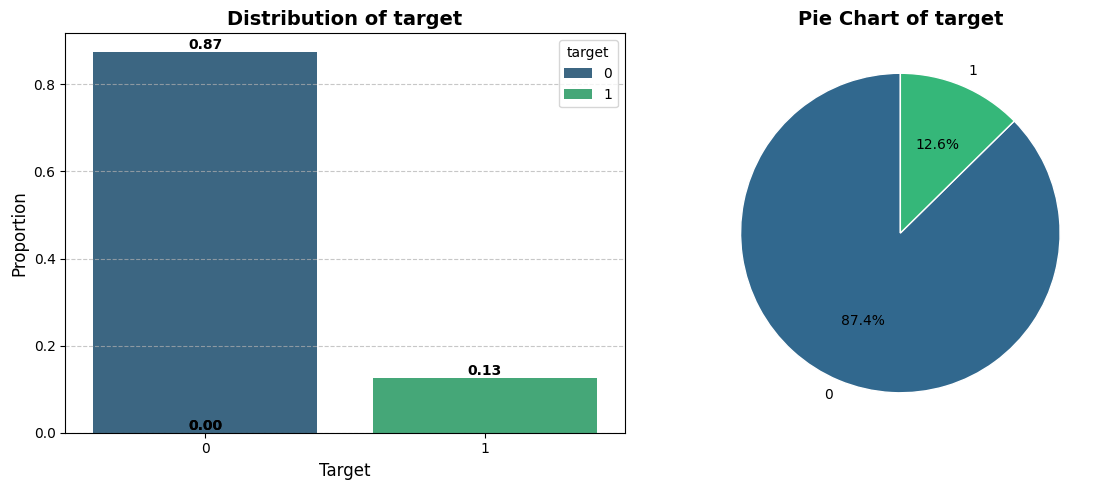

In [ ]:
single_cat_col(df['target'].value_counts(normalize=True), cat_col='target', normalize=True)

<div style="background-color: #eaf2f8; padding: 20px; border-radius: 10px; border: solid 2px #003366; box-shadow: 3px 3px 10px rgba(0, 0, 0, 0.1); margin-bottom: 20px;">
    <h2 style="color: #003366; text-align: center;">Observation</h2>
    <ul style="font-size: 1.2em; color: #003366; list-style-type: disc; margin-left: 20px;">
        <li><strong>Data is imbalanced:</strong> 87.4% of the emails are ham and 12.6% are spam.</li>
    </ul>
</div>


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df = df.with_columns(
    df['text'].map_elements(len, return_dtype=int).alias("num_characters"),
    df['text'].map_elements(lambda x:len(nltk.word_tokenize(x)), return_dtype=int).alias("num_words"),
    df['text'].map_elements(lambda x:len(nltk.sent_tokenize(x)), return_dtype=int).alias("num_sentences")
)
df.head()

target,text,num_characters,num_words,num_sentences
i32,str,i64,i64,i64
0,"""hanks lotsly!""",13,3,1
0,"""Give one miss from that number…",37,7,1
0,"""cThen i thk shd b enuff.. Stil…",116,27,3
0,"""ÌÏ got wat to buy tell us then…",59,16,1
0,"""Nowadays people are notixiquat…",274,45,3


In [ ]:
df.select(['num_characters','num_words','num_sentences']).describe()

statistic,num_characters,num_words,num_sentences
str,f64,f64,f64
"""count""",5169.0,5169.0,5169.0
"""null_count""",0.0,0.0,0.0
"""mean""",78.977945,18.455794,1.965564
"""std""",58.236293,13.324758,1.448541
"""min""",2.0,1.0,1.0
"""25%""",36.0,9.0,1.0
"""50%""",60.0,15.0,1.0
"""75%""",117.0,26.0,2.0
"""max""",910.0,220.0,38.0


In [ ]:
# ham
df.filter(pl.col('target') == 0)[['num_characters','num_words','num_sentences']].describe()

statistic,num_characters,num_words,num_sentences
str,f64,f64,f64
"""count""",4516.0,4516.0,4516.0
"""null_count""",0.0,0.0,0.0
"""mean""",70.459256,17.123782,1.820195
"""std""",56.358207,13.49397,1.383657
"""min""",2.0,1.0,1.0
"""25%""",34.0,8.0,1.0
"""50%""",52.0,13.0,1.0
"""75%""",90.0,22.0,2.0
"""max""",910.0,220.0,38.0


In [ ]:
#spam
df.filter(pl.col('target') == 1)[['num_characters','num_words','num_sentences']].describe()

statistic,num_characters,num_words,num_sentences
str,f64,f64,f64
"""count""",653.0,653.0,653.0
"""null_count""",0.0,0.0,0.0
"""mean""",137.891271,27.667688,2.970904
"""std""",30.137753,7.008418,1.488425
"""min""",13.0,2.0,1.0
"""25%""",132.0,25.0,2.0
"""50%""",149.0,29.0,3.0
"""75%""",157.0,32.0,4.0
"""max""",224.0,46.0,9.0


In [ ]:
def plot_num_col(data=None, num_col=None, kde=True, bins=10, width=14, height=6):
    fig, axes = plt.subplots(2, 2, figsize=(width, height))  # 2 rows, 2 columns

    # Convert Polars DataFrame to Pandas for Seaborn compatibility
    data_pd = data.to_pandas()

    # Split data based on the 'target' column
    data1 = data_pd[data_pd['target'] == 0]
    data2 = data_pd[data_pd['target'] == 1]

    # Color palette
    colors = sns.color_palette("Set1", n_colors=2)

    # Histogram for target = 0
    sns.histplot(data=data1, x=num_col, kde=kde, bins=bins, ax=axes[0, 0], color=colors[0], alpha=0.6)
    axes[0, 0].set_title(f"Distribution of {num_col} (Target = 0)", fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel(num_col.capitalize(), fontsize=12)
    axes[0, 0].set_ylabel("Count", fontsize=12)
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.5)

    # Box Plot for target = 0
    sns.boxplot(x=data1[num_col], ax=axes[1, 0], color=colors[0])
    axes[1, 0].set_title(f"Boxplot of {num_col} (Target = 0)", fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel(num_col.capitalize(), fontsize=12)

    # Histogram for target = 1
    sns.histplot(data=data2, x=num_col, kde=kde, bins=bins, ax=axes[0, 1], color=colors[1], alpha=0.6)
    axes[0, 1].set_title(f"Distribution of {num_col} (Target = 1)", fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel(num_col.capitalize(), fontsize=12)
    axes[0, 1].set_ylabel("Count", fontsize=12)
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.5)

    # Box Plot for target = 1
    sns.boxplot(x=data2[num_col], ax=axes[1, 1], color=colors[1])
    axes[1, 1].set_title(f"Boxplot of {num_col} (Target = 1)", fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel(num_col.capitalize(), fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()

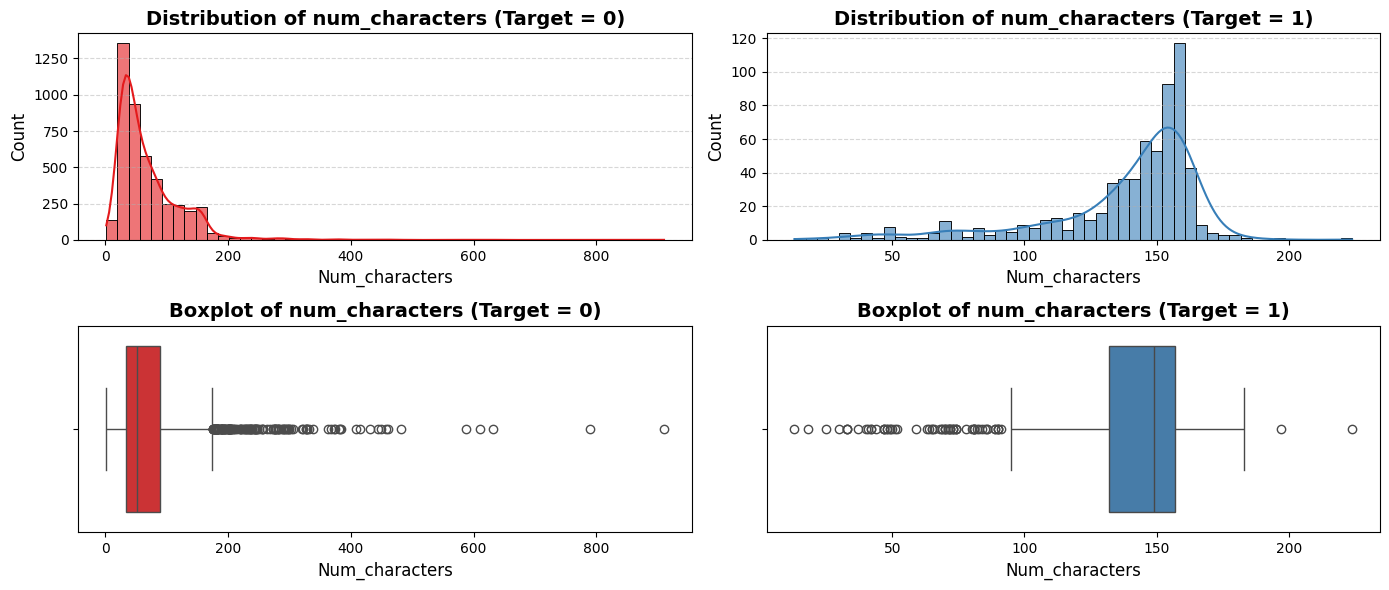

In [ ]:
plot_num_col(data=df, num_col='num_characters', kde=True, bins=50)

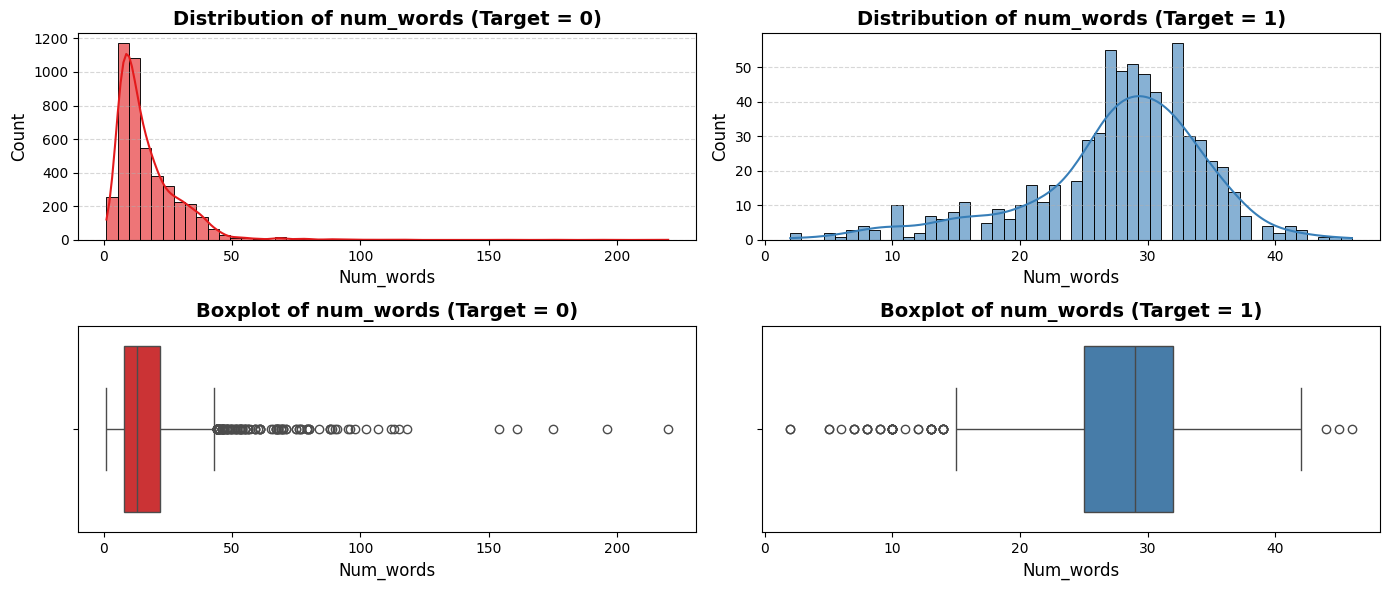

In [ ]:
plot_num_col(data=df, num_col='num_words', kde=True, bins=50)

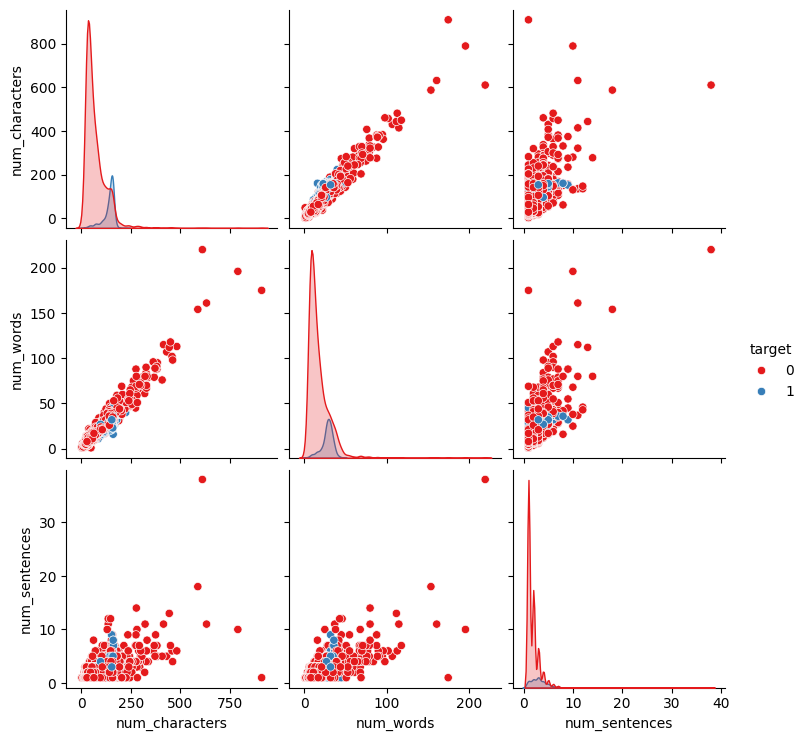

In [ ]:
sns.pairplot(df.to_pandas(),hue='target',x_vars=['num_characters','num_words','num_sentences'],y_vars=['num_characters','num_words','num_sentences'],palette='Set1')
plt.show()

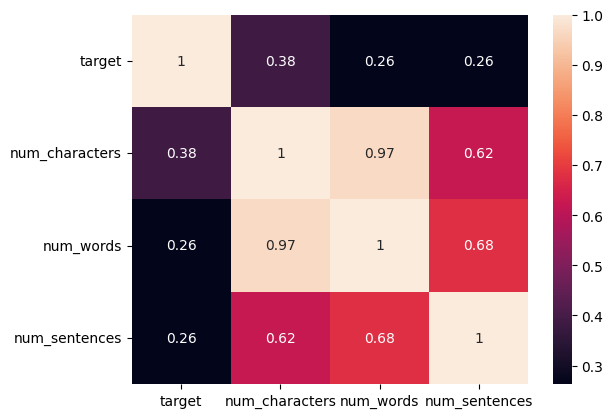

In [ ]:
sns.heatmap(df.drop('text').corr(),xticklabels=df.drop('text').corr().columns,yticklabels=df.drop('text').corr().columns,annot=True)
plt.show()

# **3. Data Preprocessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))  # Convert to set for faster lookups

def transform_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing special characters, stop words, and punctuation + Stemming
    processed_tokens = [ps.stem(word) for word in tokens if word.isalnum() and word not in stop_words]

    # Return the cleaned and transformed text
    return " ".join(processed_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
transform_text(df['text'][1])

'trip ok quit tire lor uni start today ok 4 co take modul ju concentr final yr project'

In [ ]:
df = df.with_columns(
    pl.col('text').map_elements(transform_text, return_dtype=str).alias('transformed_text')
)
df.shape

(5169, 6)

In [ ]:
df.head()

target,text,num_characters,num_words,num_sentences,transformed_text
i32,str,i64,i64,i64,str
0,"""I was wondering if it would be…",338,79,4,"""wonder would okay call uncl jo…"
0,"""My trip was ok but quite tirin…",147,34,2,"""trip ok quit tire lor uni star…"
0,"""Yes :)it completely in out of …",59,16,1,"""ye complet form clark also utt…"
0,"""Indeed and by the way it was e…",51,13,1,"""inde way either"""
1,"""New TEXTBUDDY Chat 2 horny guy…",130,26,2,"""new textbuddi chat 2 horni guy…"


In [ ]:
from wordcloud import WordCloud

def plot_word_cloud(dataframe, target, column_name="text", title_prefix="Word Cloud", title_color = 'lime'):
    """
    Generate and visualize a word cloud for a specific engagement level.

    Args:
        dataframe (pl.DataFrame): The dataframe containing the text data.
        target (str): The target to filter (e.g., "ham", "spam").
        column_name (str): The column containing the text data (default is "text").
        title_prefix (str): The prefix for the plot title (default is "Word Cloud").
    """
    # Filter the dataframe for the specified target
    filtered_text = " ".join(
        dataframe.filter(pl.col("target") == target)[column_name].to_list()
    )

    # Create the WordCloud object
    wc = WordCloud(
        width=800,
        height=400,
        min_font_size=5,
        background_color='black',
        colormap='cool',
        contour_color='white',
        contour_width=1
    ).generate(filtered_text)

    # Plot the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title_prefix}", fontsize=24, fontweight='bold', color=title_color)
    # plt.tight_layout()
    plt.show()

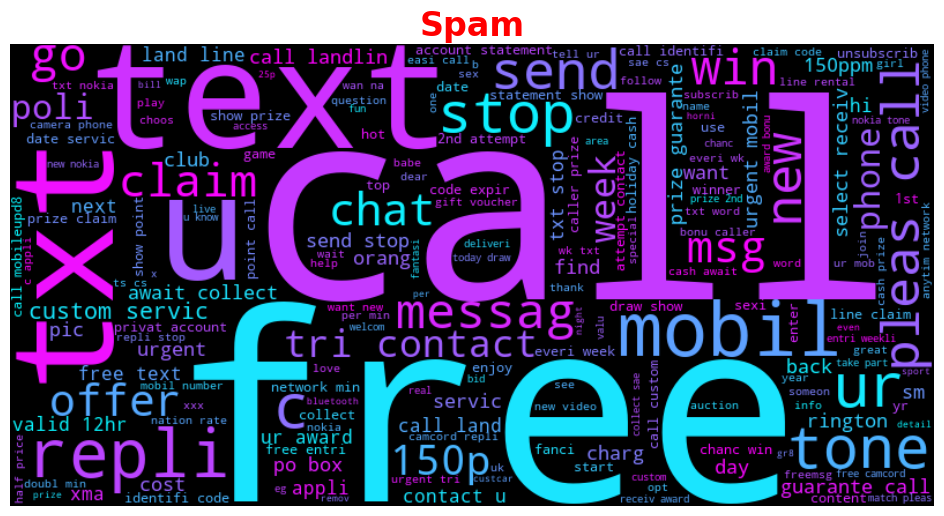

In [ ]:
plot_word_cloud(df,target=1, column_name = "transformed_text", title_prefix="Spam",title_color='red')

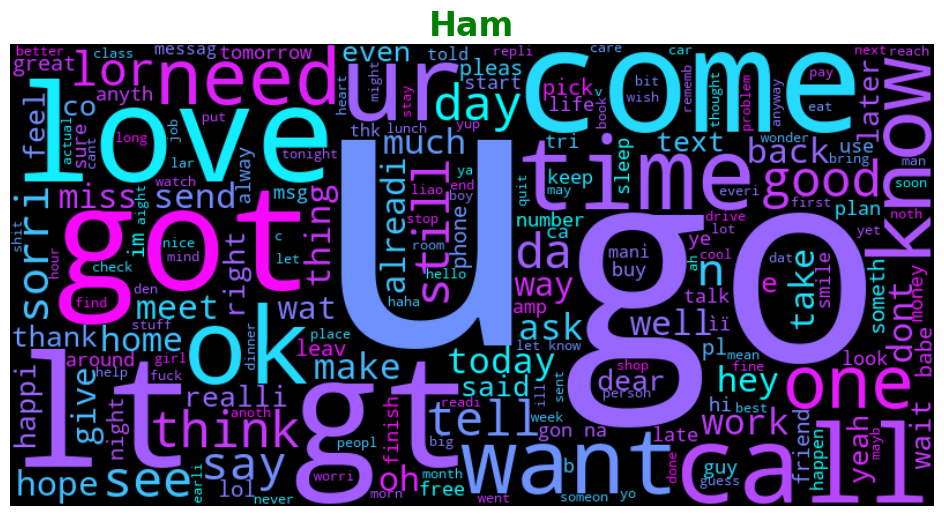

In [ ]:
plot_word_cloud(df,target=0, column_name = "transformed_text", title_prefix="Ham",title_color='green')


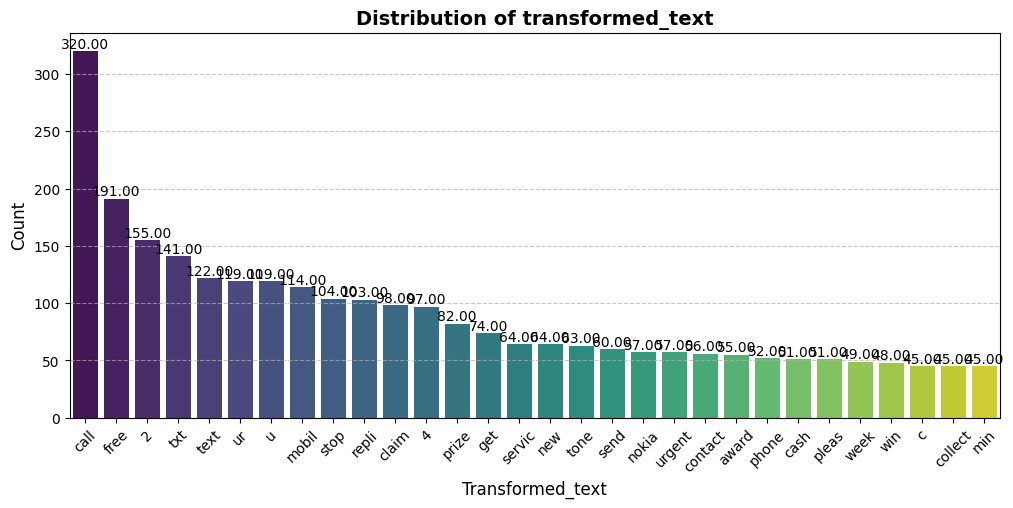

In [ ]:
spam_data = (df.filter(pl.col('target') == 1)['transformed_text'].str.split(by=" ").explode().value_counts()
 .sort(by='count',descending=True).head(30))
single_cat_col(spam_data, cat_col='transformed_text', normalize=False, rot=45)

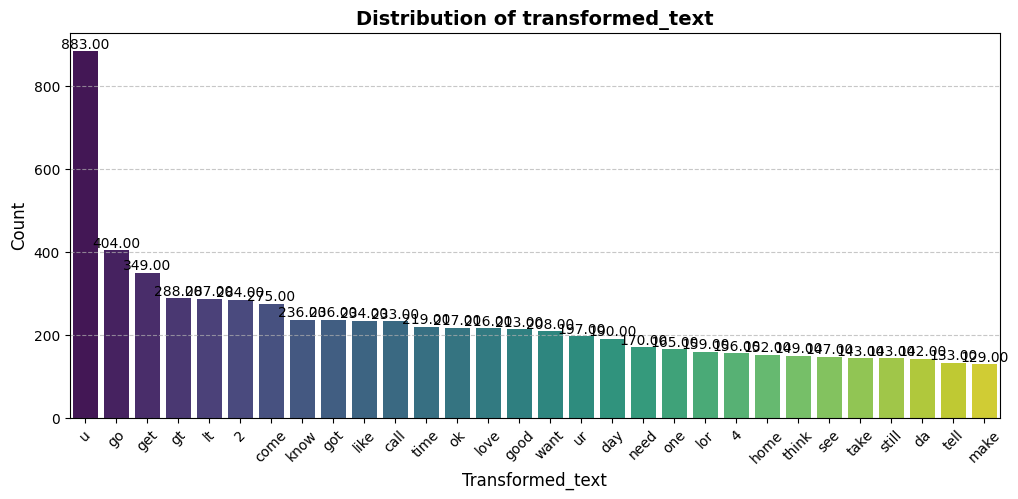

In [ ]:
ham_data = (df.filter(pl.col('target') == 0)['transformed_text'].str.split(by=" ").explode().value_counts()
 .sort(by='count',descending=True).head(30))
single_cat_col(ham_data, cat_col='transformed_text', normalize=False, rot=45)

In [ ]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# **4. Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier,VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [ ]:
# Define feature extraction
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
# Convert text to features
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target']
X.shape, y.shape

((5169, 3000), (5169,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

- If a non-spam email is classified as spam (False Positive), the user loses an important email, which is worse than missing a spam email (False Negative).
- High precision ensures that when the model classifies an email as spam, it's truly spam.


In [ ]:
# Define models
models = {
    "LogisticRegression": LogisticRegression(solver='liblinear', penalty='l1'),
    "SVC": SVC(kernel='sigmoid', gamma=1.0),
    "DecisionTree": DecisionTreeClassifier(max_depth=5),
    "RandomForest": RandomForestClassifier(n_estimators=50, random_state=2),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=2),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=2),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=50, random_state=2),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=50, random_state=2),
    "XGBClassifier": XGBClassifier(n_estimators=50, random_state=2),
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=2)

best_model = None
best_score = float("-inf")  # Highest precision

for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)  # ML model
    ])

    # Perform 5-fold cross-validation using precision
    scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring="precision")

    mean_score = np.mean(scores)  # Take the mean precision score

    print(f"{name}: Mean CV Precision = {mean_score:.4f}")

    # Select the best model based on highest precision
    if mean_score > best_score:
        best_score = mean_score
        best_model = model  # Store the best model

print(f"\nBest Model Selected: {best_model} with CV Precision: {best_score:.4f}")

LogisticRegression: Mean CV Precision = 0.9281
SVC: Mean CV Precision = 0.9738
DecisionTree: Mean CV Precision = 0.8383
RandomForest: Mean CV Precision = 0.9906
AdaBoost: Mean CV Precision = 0.8048
Bagging: Mean CV Precision = 0.8675
ExtraTrees: Mean CV Precision = 0.9675
GradientBoosting: Mean CV Precision = 0.9526
XGBClassifier: Mean CV Precision = 0.9203
GaussianNB: Mean CV Precision = 0.4822
MultinomialNB: Mean CV Precision = 0.9976
BernoulliNB: Mean CV Precision = 0.9730

Best Model Selected: MultinomialNB() with CV Precision: 0.9976


In [ ]:
# Train best model on full training set
best_model.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_model.predict(X_test)

# Print final metrics
print("\nFinal Test Set Performance:")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Final Test Set Performance:
Precision: 1.0000
Accuracy: 0.9720
Recall: 0.7883
F1 Score: 0.8816


In [ ]:
# tfidf --> MNB

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='hard')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [ ]:
y_pred = voting.predict(X_test)
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Precision: 1.0000
Accuracy: 0.9749
Recall: 0.8102
F1 Score: 0.8952


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9669421487603306


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(best_model,open('model.pkl','wb'))